## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Read data

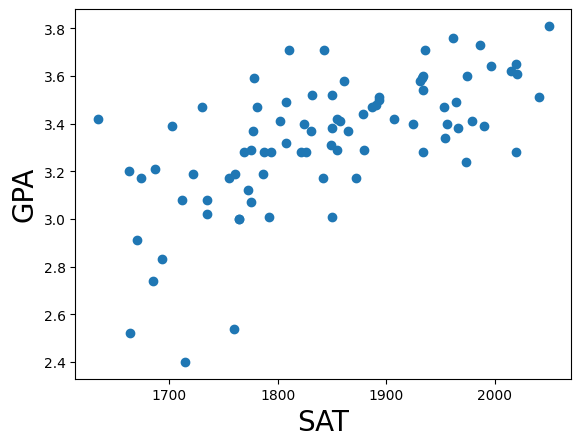

In [2]:
data = pd.read_csv("./SAT_GPA.csv")
data.describe()
y = data['GPA']
x = data['SAT']

plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Split data to train data and validate data

In [3]:
x = np.asarray(x).reshape(-1,1)
y = np.asarray(y).reshape(-1,1)

train_data = x[:60]
y_data = y[:60]

validate_data = x[60:]
y_validate = y[60:]

## Building Xbar

In [4]:
one = np.ones((train_data.shape[0], 1))
Xbar = np.concatenate((one, train_data), axis = 1)

## Calculating weights of the fitting line

In [5]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y_data)
w = np.dot(np.linalg.pinv(A), b)

## Preparing the fitting line

In [6]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(1640, 2060, 2)
y0 = w_0 + w_1*x0


## Drawing the fiting line

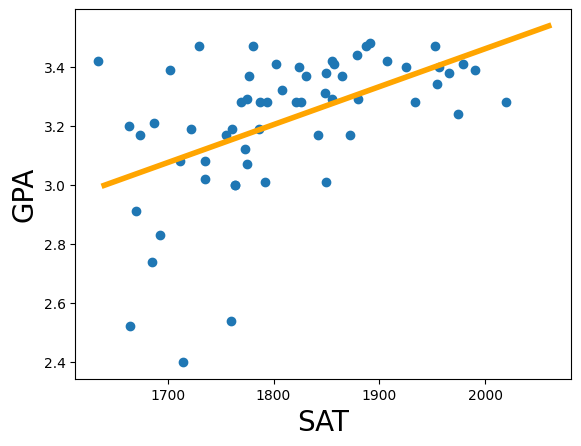

In [7]:
plt.scatter(train_data,y_data)
fig = plt.plot(x0,y0, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Predict validate model of validate data and show mean square error

In [10]:
y_pre = [w_0 + w_1 * val for val in validate_data]
print("validate predict: \n", y_pre)

mse = mean_squared_error(y_validate, y_pre)
print("\nMean square error is:",mse)

validate predict: 
 [array([3.4146054]), array([3.21403576]), array([3.3233205]), array([3.51360452]), array([3.3233205]), array([3.24489263]), array([3.26803528]), array([3.37603432]), array([3.28217801]), array([3.37217721]), array([3.37474861]), array([3.17546468]), array([3.42874813]), array([3.37603432]), array([3.48789046]), array([3.48017624]), array([3.45703359]), array([3.48660476]), array([3.25903536]), array([3.37860572]), array([3.21660717]), array([3.44417657]), array([3.412034]), array([3.52517584])]

Mean square error is: 0.06994526433231052
